# **Task #1**

In [35]:
# import the libraries
from matplotlib.colors import ListedColormap
from sklearn import  datasets, metrics, tree 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset**

Loading data

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

bioresponse = pd.read_csv('/content/drive/My Drive/bioresponse.csv', header=0, sep=',')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
bioresponse

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.000000,0.00,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,0.000000,0.0000,0.000000,0.071800,0.362006,0.229374,0.603893,0.129706,0.092400,0.036100,0.00473,0.069000,1,0.00,0.486439,0.783710,1,1,0.000000,0.364694,0.136861,0.047300,0.100295,0.00000,0.000000,0.000000,0.00,0.223324,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,0.085200,0.2500,0.064500,0.121309,0.347521,0.250846,0.660747,0.221975,0.167944,0.065700,0.00939,0.172414,1,0.00,0.390864,0.815279,0,1,0.000000,0.153533,0.127563,0.122141,0.104815,0.08000,0.191429,0.146735,0.00,0.101137,0.075100,...,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,0.624027,0.1875,0.064500,0.091700,0.519094,0.243037,0.691896,0.215831,0.338637,0.290643,0.04450,0.103448,1,0.00,0.590995,0.581372,0,0,0.333333,0.128839,0.357203,0.077600,0.028500,0.06200,0.308468,0.166667,0.00,0.019900,0.377263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.37293

Dividing target and feature variables

In [6]:
y = bioresponse['Activity'].values
X = bioresponse.drop("Activity", axis=1)

Train/test splitting of the data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


**Model Small DecisionTreeClassifier**

In [24]:
small_tree = tree.DecisionTreeClassifier(random_state=1, max_depth = 3)
small_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

**Model Deep DecisionTreeClassifier**

In [25]:
deep_tree = tree.DecisionTreeClassifier(random_state=1, max_depth = 10)
deep_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

**Model Small RandomForestClassifier**

In [26]:
small_forest = RandomForestClassifier(random_state=1, max_depth = 3)
small_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

**Model Deep RandomForestClassifier**

In [27]:
deep_forest = RandomForestClassifier(random_state=1, max_depth = 10)
deep_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

**2. Calculate the following metrics to check the quality of your models**

**Metrics for Small DecisionTreeClassifier**

In [28]:
st_pred = small_tree.predict(X_test)

st_prec = metrics.precision_score(y_test, st_pred)
st_rec = metrics.recall_score(y_test, st_pred)
st_acc = metrics.accuracy_score(y_test, st_pred)
st_f1 = metrics.f1_score(y_test, st_pred)
st_log = metrics.log_loss(y_test, st_pred)

print("precision = ", st_prec)
print("recall = ", st_rec)
print("accuracy = ", st_acc)
print("f1 = ", st_f1)
print("log_loss = ", st_log)

precision =  0.7853810264385692
recall =  0.8118971061093248
accuracy =  0.7735346358792184
f1 =  0.7984189723320159
log_loss =  7.821934569402834


**Metrics for Deep DecisionTreeClassifier**

In [29]:
dt_pred = deep_tree.predict(X_test)

dt_prec = metrics.precision_score(y_test, dt_pred)
dt_rec = metrics.recall_score(y_test, dt_pred)
dt_acc = metrics.accuracy_score(y_test, dt_pred)
dt_f1 = metrics.f1_score(y_test, dt_pred)
dt_log = metrics.log_loss(y_test, dt_pred)

print("precision = ", dt_prec)
print("recall = ", dt_rec)
print("accuracy = ", dt_acc)
print("f1 = ", dt_f1)
print("log_loss = ", dt_log)

precision =  0.7798013245033113
recall =  0.7572347266881029
accuracy =  0.7477797513321492
f1 =  0.768352365415987
log_loss =  8.711473217240542


**Metrics for Small RandomForestClassifier**

In [30]:
sf_pred = small_forest.predict(X_test)

sf_prec = metrics.precision_score(y_test, sf_pred)
sf_rec = metrics.recall_score(y_test, sf_pred)
sf_acc = metrics.accuracy_score(y_test, sf_pred)
sf_f1 = metrics.f1_score(y_test, sf_pred)
sf_log = metrics.log_loss(y_test, sf_pred)

print("precision = ", sf_prec)
print("recall = ", sf_rec)
print("accuracy = ", sf_acc)
print("f1 = ", sf_f1)
print("log_loss = ", sf_log)

precision =  0.749211356466877
recall =  0.7636655948553055
accuracy =  0.7282415630550622
f1 =  0.7563694267515924
log_loss =  9.38631679647786


**Metrics for Deep RandomForestClassifier**

In [31]:
df_pred = deep_forest.predict(X_test)

df_prec = metrics.precision_score(y_test, df_pred)
df_rec = metrics.recall_score(y_test, df_pred)
df_acc = metrics.accuracy_score(y_test, df_pred)
df_f1 = metrics.f1_score(y_test, df_pred)
df_log = metrics.log_loss(y_test, df_pred)

print("precision = ", df_prec)
print("recall = ", df_rec)
print("accuracy = ", df_acc)
print("f1 = ", df_f1)
print("log_loss = ", df_log)

precision =  0.8147540983606557
recall =  0.7990353697749196
accuracy =  0.7886323268206039
f1 =  0.8068181818181819
log_loss =  7.3004610448475615


**3. Plot precision-recall and ROC curves for your models.**

**Model Small DecisionTreeClassifier**

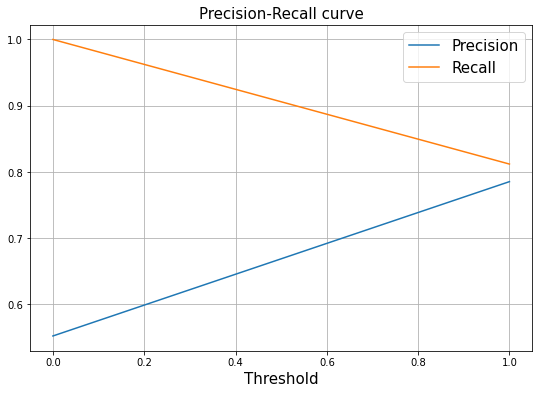

In [36]:
prec, rec, thresh = metrics.precision_recall_curve(y_test, st_pred)
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

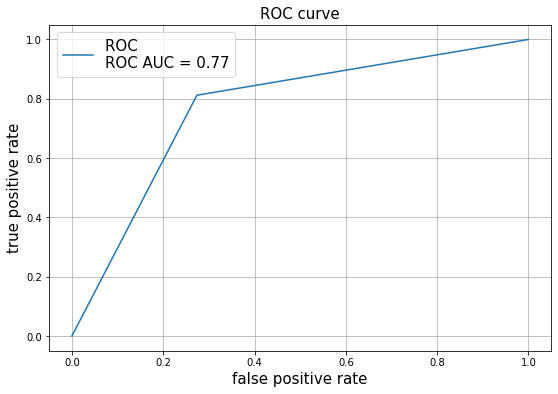

In [38]:
fpr, tpr, thr = metrics.roc_curve(y_test, st_pred)
roc_auc = metrics.roc_auc_score(y_test, st_pred)

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

**Model Deep DecisionTreeClassifier**

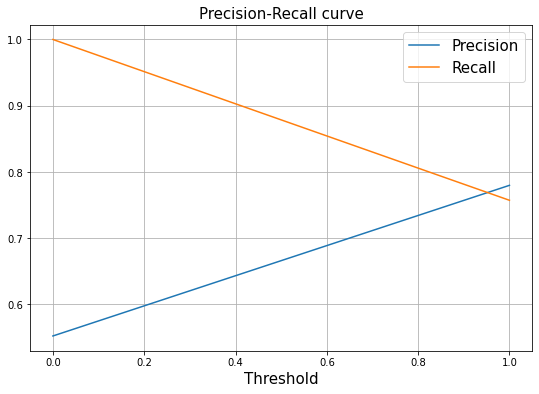

In [41]:
prec, rec, thresh = metrics.precision_recall_curve(y_test, dt_pred)
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

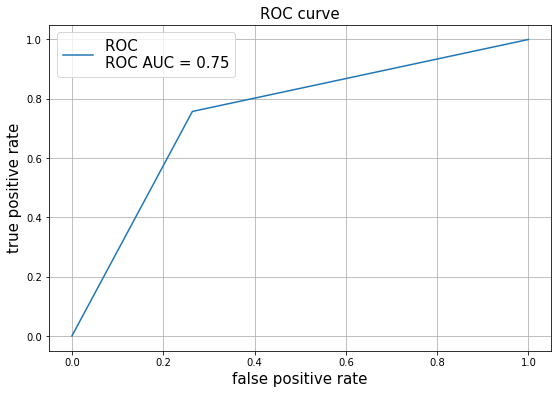

In [42]:
fpr, tpr, thr = metrics.roc_curve(y_test, dt_pred)
roc_auc = metrics.roc_auc_score(y_test, dt_pred)

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

**Model Small RandomForestClassifier**

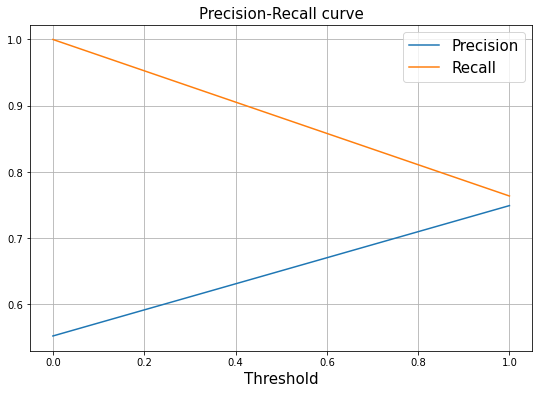

In [43]:
prec, rec, thresh = metrics.precision_recall_curve(y_test, sf_pred)
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

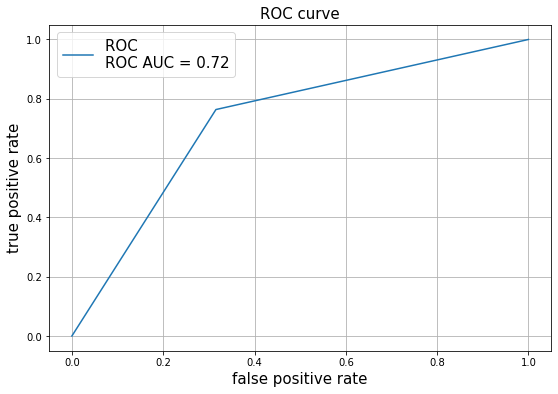

In [45]:
fpr, tpr, thr = metrics.roc_curve(y_test, sf_pred)
roc_auc = metrics.roc_auc_score(y_test, sf_pred)

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

**Model Deep RandomForestClassifier**

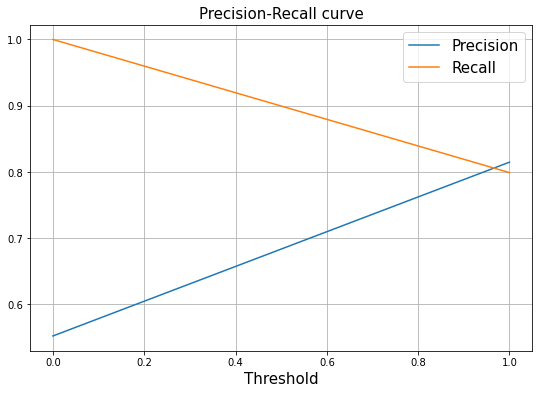

In [46]:
prec, rec, thresh = metrics.precision_recall_curve(y_test, df_pred)
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

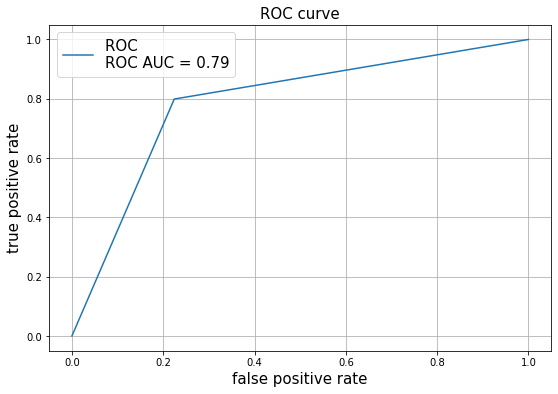

In [47]:
fpr, tpr, thr = metrics.roc_curve(y_test, df_pred)
roc_auc = metrics.roc_auc_score(y_test, df_pred)

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

**4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.**

*class_weight* boosts the loss function towards the preferred type of error. So we avoid Type II errors by giving second class a bigger weight

In [54]:
class_weight={0:1,1:2}

fn_classifier = RandomForestClassifier(random_state=1, max_depth = 5, class_weight=class_weight)
fn_classifier.fit(X_train, y_train)

fn_pred = fn_classifier.predict(X_test)

fn_prec = metrics.precision_score(y_test, fn_pred)
fn_rec = metrics.recall_score(y_test, fn_pred)
fn_acc = metrics.accuracy_score(y_test, fn_pred)
fn_f1 = metrics.f1_score(y_test, fn_pred)
fn_log = metrics.log_loss(y_test, fn_pred)

print("precision = ", fn_prec)
print("recall = ", fn_rec)
print("accuracy = ", fn_acc)
print("f1 = ", fn_f1)
print("log_loss = ", fn_log)

precision =  0.6160896130346232
recall =  0.9726688102893891
accuracy =  0.650088809946714
f1 =  0.7543640897755611
log_loss =  12.085772067341026


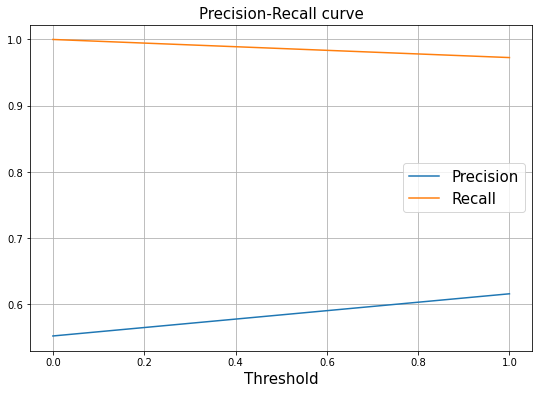

In [55]:
prec, rec, thresh = metrics.precision_recall_curve(y_test, fn_pred)
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)